In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np


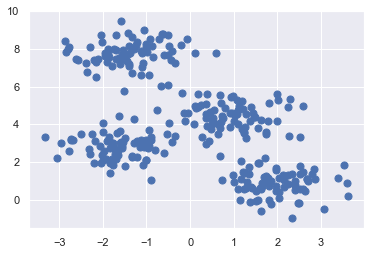

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.68, random_state=0)
plt.scatter(X[:,0], X[:,1], s=50)


In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

array([3, 1, 2, 1, 3, 3, 0, 2, 1, 1, 0, 1, 2, 1, 3, 2, 2, 3, 0, 0, 3, 3,
       2, 0, 0, 2, 3, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 3, 2, 0, 2, 2,
       0, 0, 1, 0, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 1, 3, 1, 2, 1, 0, 0, 0,
       1, 3, 1, 0, 2, 0, 1, 0, 0, 1, 0, 2, 3, 1, 3, 2, 3, 3, 1, 2, 3, 2,
       1, 1, 2, 3, 1, 0, 0, 2, 3, 3, 2, 0, 1, 3, 1, 3, 2, 3, 3, 2, 1, 2,
       0, 0, 3, 1, 3, 2, 1, 3, 3, 2, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 1, 0,
       0, 3, 1, 0, 0, 1, 2, 1, 1, 0, 2, 0, 2, 0, 1, 2, 1, 1, 1, 2, 1, 2,
       3, 0, 1, 0, 3, 2, 1, 2, 2, 3, 2, 0, 0, 2, 3, 2, 2, 1, 3, 2, 0, 1,
       3, 3, 2, 0, 3, 2, 0, 0, 2, 2, 2, 2, 3, 1, 2, 0, 2, 2, 0, 0, 0, 2,
       0, 1, 2, 0, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 0, 3, 3, 2,
       1, 3, 3, 0, 3, 0, 2, 1, 1, 2, 2, 1, 2, 3, 0, 2, 3, 0, 1, 0, 3, 2,
       3, 1, 1, 1, 1, 0, 0, 1, 2, 0, 3, 2, 0, 0, 2, 3, 3, 1, 2, 2, 0, 3,
       1, 0, 2, 1, 2, 3, 3, 0, 0, 2, 3, 3, 3, 2, 1, 1, 3, 3, 2, 3, 3, 3,
       1, 0, 1, 2, 3, 3, 1, 1, 1, 3, 3, 2, 1, 0], d

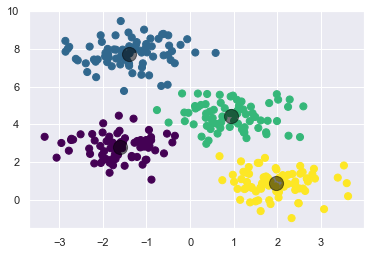

In [9]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X,n_clusters, rseed=2):
    
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers =X[i]
    
    while True:
        labels = pairwise_distances_argmin(X,centers)
        
        new_centers = np.array([X[labels == i].mean(0)
                              for i in range(n_clusters)])
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers,labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=50, cmap='viridis')

plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)

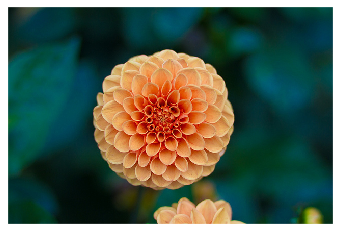

In [12]:
from sklearn.datasets import load_sample_image
china = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[],yticks=[])
ax.imshow(china)

In [14]:
china.shape

(427, 640, 3)

In [15]:
data = china/255
data = data.reshape(427*640, 3)
data.shape

(273280, 3)

In [22]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data
        
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16,6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0,1))
    
    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0,1))
    
    fig.suptitle(title, size=20);

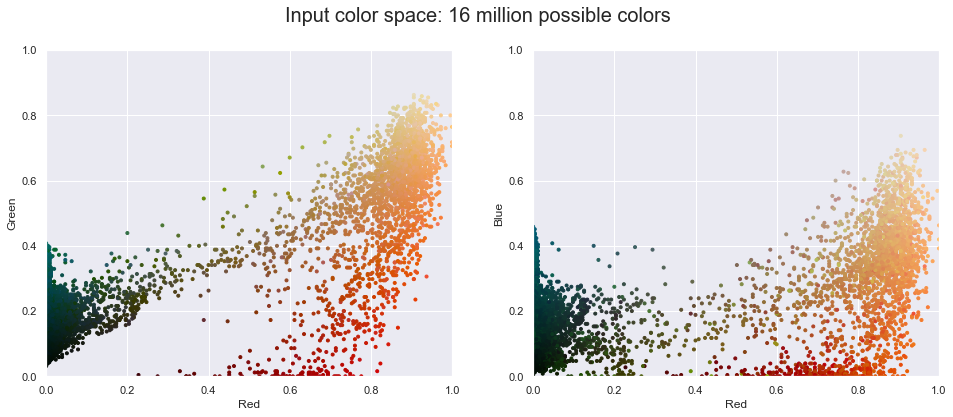

In [23]:
plot_pixels(data, title='Input color space: 16 million possible colors')

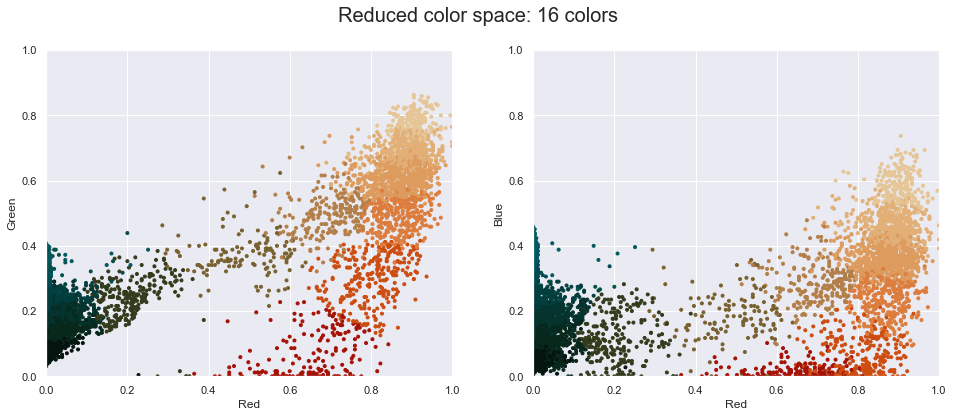

In [24]:
import warnings; warnings.simplefilter('ignore')

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

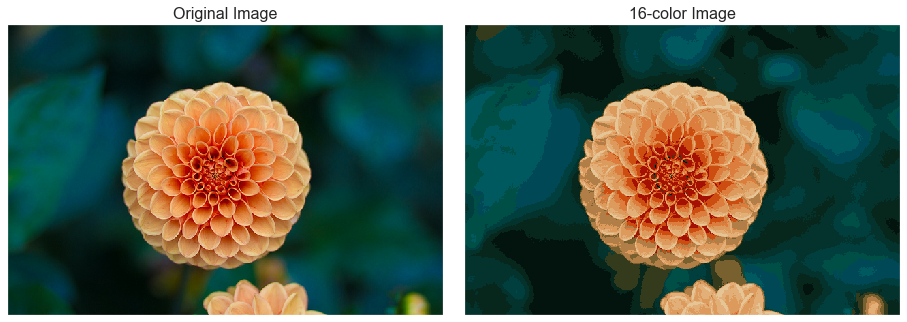

In [26]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16,6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);

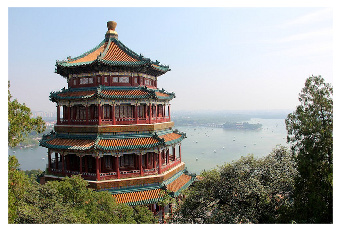

In [31]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [34]:
 china.shape

(427, 640, 3)

In [35]:
china

array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [250, 251, 255],
        [250, 251, 255],
        [250, 251, 255]],

       [[172, 199, 229],
        [173, 200, 230],
        [173, 200, 230],
        ...,
        [251, 252, 255],
        [251, 252, 255],
        [251, 252, 255]],

       [[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],
        ...,
        [252, 253, 255],
        [252, 253, 255],
        [252, 253, 255]],

       ...,

       [[ 88,  80,   7],
        [147, 138,  69],
        [122, 116,  38],
        ...,
        [ 39,  42,  33],
        [  8,  14,   2],
        [  6,  12,   0]],

       [[122, 112,  41],
        [129, 120,  53],
        [118, 112,  36],
        ...,
        [  9,  12,   3],
        [  9,  15,   3],
        [ 16,  24,   9]],

       [[116, 103,  35],
        [104,  93,  31],
        [108, 102,  28],
        ...,
        [ 43,  49,  39],
        [ 13,  21,   6],
        [ 15,  24,   7]]

In [33]:
data = china/255
data = data.reshape(427*640, 3)
data.shape

(273280, 3)

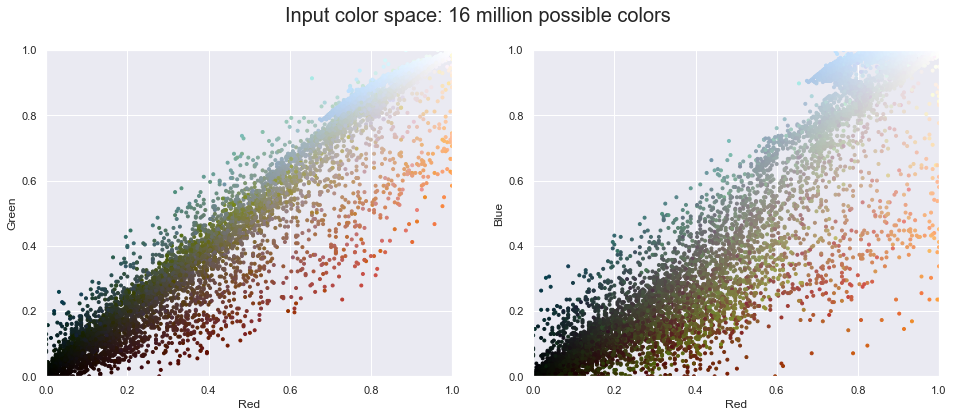

In [36]:
plot_pixels(data, title='Input color space: 16 million possible colors')

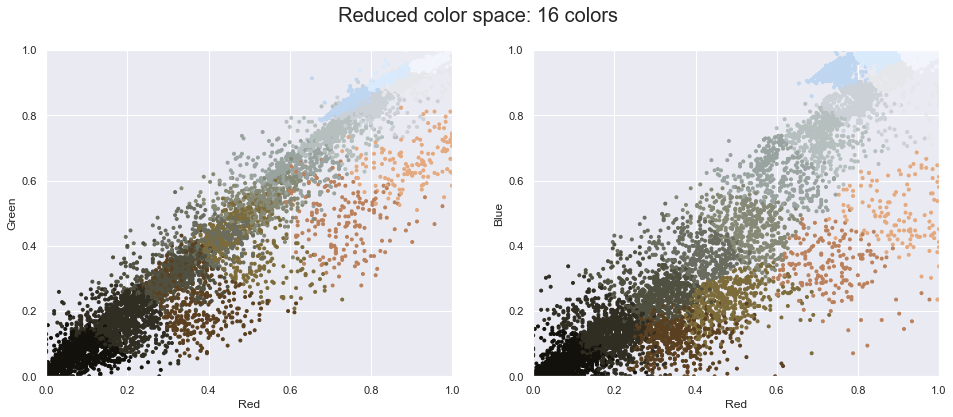

In [37]:
import warnings; warnings.simplefilter('ignore')

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors, title="Reduced color space: 16 colors")

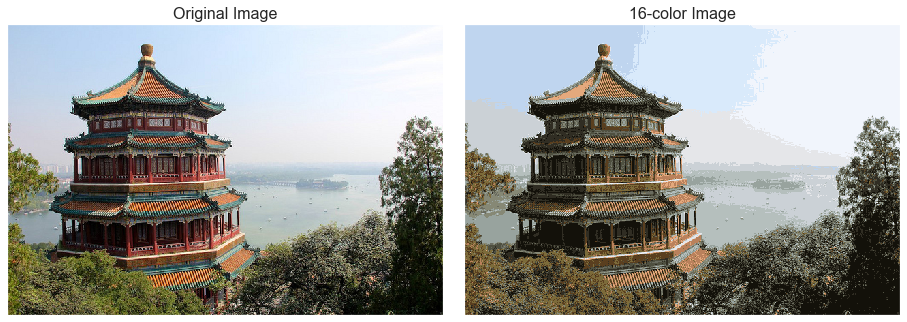

In [38]:
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16,6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);